In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data(file_path):
    data = pd.read_csv("Bank Customer Churn Prediction.csv")
    X = data.drop(columns=['churn'])
    y = data['churn']
    return X, y


In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_data(X):

    X_encoded = pd.get_dummies(X, drop_first=True)


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    return pd.DataFrame(X_scaled, columns=X_encoded.columns)


In [3]:
def split_data(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [5]:
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


In [6]:
def gradient_descent(X, y, weights, learning_rate, num_epochs):
    m = len(y)
    costs = []

    for epoch in range(num_epochs):
        predictions = sigmoid(np.dot(X, weights))
        gradients = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradients

        cost = compute_cost(X, y, weights)
        costs.append(cost)

    return weights, costs


In [7]:
import matplotlib.pyplot as plt

def plot_cost(costs, title="Cost vs Epochs"):
    plt.plot(range(len(costs)), costs)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title(title)
    plt.show()


In [8]:
def evaluate_model(X_train, y_train, X_test, y_test, weights):
    # Training and testing costs
    train_cost = compute_cost(X_train, y_train, weights)
    test_cost = compute_cost(X_test, y_test, weights)

    return train_cost, test_cost


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_sklearn_model(X_train, y_train, C, max_iter):
    model = LogisticRegression(C=C, max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)
    return model


In [10]:
def evaluate_sklearn_model(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-Score': f1_score(y_test, y_test_pred)
    }

    return metrics, confusion_matrix(y_test, y_test_pred)


In [19]:
def main(file_path):

    X, y = load_data(file_path)
    X = preprocess_data(X)
    y = y.values

    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)


    weights = np.zeros(X_train.shape[1])


    weights, costs = gradient_descent(X_train, y_train, weights, learning_rate=0.01, num_epochs=1000)
    plot_cost(costs, "Training Cost for Manual Logistic Regression")

    train_cost, test_cost = evaluate_model(X_train, y_train, X_test, y_test, weights)
    print("Training Cost:", train_cost)
    print("Testing Cost:", test_cost)
    model = train_sklearn_model(X_train, y_train, C=1.0, max_iter=500)
    metrics, cm = evaluate_sklearn_model(model, X_train, y_train, X_test, y_test)

    print("\nSklearn Metrics:")
    for metric_name, metric_value in metrics.items():
         print(f"{metric_name}: {metric_value:.4f}")  # Adjust decimal places as needed

    print("Confusion Matrix:\n", cm)


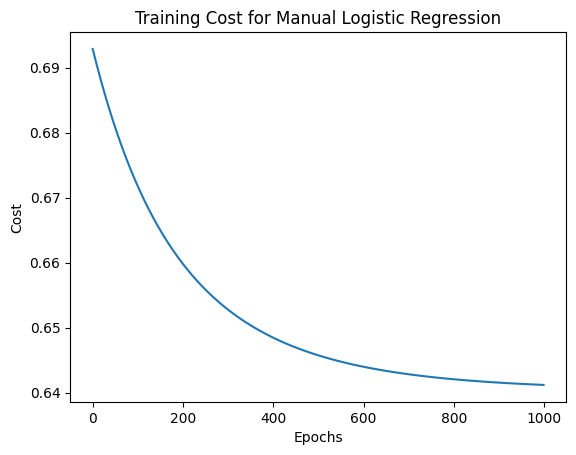

Training Cost: 0.6412000863183758
Testing Cost: 0.6459062584404237

Sklearn Metrics:
Train Accuracy: 0.8100
Test Accuracy: 0.8117
Precision: 0.5446
Recall: 0.1986
F1-Score: 0.2911
Confusion Matrix:
 [[2319   97]
 [ 468  116]]


In [20]:
if __name__ == "__main__":
    main("path_to_your_csv_file.csv")  # Replace with the actual path to your dataset
